# Areas of Interest Preprocessing (AOI) Preprocessing and Analysis

In this notebook, we will preprocess the eye gazing features to discretecize the screen into different regions of interest (16 regions of interest : AA, AB, ..., DD)

#

In [12]:
#We import the needed libraries
import numpy as np
import pandas as pd
import torch
from data_loader import *
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['agg.path.chunksize'] = 0
mpl.rcParams.update( mpl.rc_params() )
plt.rcParams.update({'font.size': 11})
#plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': 'bold'})
plt.rc('font', family='serif')

In [2]:
df_train = pd.read_csv('splits/train.csv')
df_test = pd.read_csv('splits/test.csv')
df_val = pd.read_csv('splits/val.csv')

In [4]:
def gaze_sequence_to_regions_sequence(sequence):
    """This function converts a sequence of eye gaze coordinates into a sequence of regions.
    Args:
        sequence (list): list of tuples containing the eye gaze coordinates
    Returns:
        list: list of regions
    """
    #We initialize the list of regions
    regions = []
    #We iterate over the sequence
    for gaze in sequence:
        #We convert the eye gaze coordinates into regions
        region = eye_gaze_to_regions(gaze[0], gaze[1])
        #We add the region to the list
        regions.append(region)
    #We return the list of regions
    return regions

In [5]:
df_train.head()

,video_key,child_id,ASD,age,gender,VideoDuration,VideoFrameRate,VideoFrameHeight,VideoFrameWidth,Confidence1,...,AgeHigh,Gender,GenderConf,Size,openface_key,openpose_jsons_path,openpose_images_path,eye_gazing_features,overall_confidence,length
0,cumlupo%40gmail.com/1590069759049/GuessWhat.mp4,cumlupo@gmail.com__Gaming,0,11.0,Male,57.6,30.2,720.0,960.0,100.0,...,42.6,Female,98.7,0.017313,cumlupo%40gmail.com/1590069759049/OpenFace.csv,cumlupo%40gmail.com/1590069759049/jsons/,cumlupo%40gmail.com/1590069759049/images/,"[[0.079657, -0.22797699999999999, -0.970403, -...",0.898710,31
1,katiarendongeorge%40gmail.com/1623718920986/Gu...,katiarendongeorge@gmail.com__Natasha,0,4.0,Female,57.6,29.9,768.0,1024.0,100.0,...,20.1,Female,97.9,0.014091,katiarendongeorge%40gmail.com/1623718920986/Op...,katiarendongeorge%40gmail.com/1623718920986/js...,katiarendongeorge%40gmail.com/1623718920986/im...,"[[0.09315, -0.014288, -0.99555, -0.05636299999...",0.968636,22
2,jidclub%40yahoo.com/1637409473208/GuessWhat.mp4,jidclub@yahoo.com__Sinachi,1,12.0,Female,57.3,30.0,720.0,960.0,100.0,...,33.4,Female,93.0,0.072120,jidclub%40yahoo.com/1637409473208/OpenFace.csv,jidclub%40yahoo.com/1637409473208/jsons/,jidclub%40yahoo.com/1637409473208/images/,"[[0.10504100000000001, 0.065097, -0.9923350000...",0.958571,28
3,yukster_uk%40yahoo.co.uk/1649930493605/GuessWh...,yukster_uk@yahoo.co.uk__Dylan,1,10.0,Male,57.3,30.0,768.0,1024.0,99.5,...,12.6,Male,94.5,0.031977,yukster_uk%40yahoo.co.uk/1649930493605/OpenFac...,yukster_uk%40yahoo.co.uk/1649930493605/jsons/,yukster_uk%40yahoo.co.uk/1649930493605/images/,"[[-0.091783, -0.238103, -0.966893, -0.187606, ...",0.937407,27
4,abhisingh404%40gmail.com/1589240919311/GuessWh...,abhisingh404@gmail.com__riya,1,5.0,Female,57.4,29.9,720.0,960.0,99.5,...,12.3,Female,97.2,0.074465,abhisingh404%40gmail.com/1589240919311/OpenFac...,abhisingh404%40gmail.com/1589240919311/jsons/,abhisingh404%40gmail.com/1589240919311/images/,"[[0.231888, -0.258358, -0.9378049999999999, 0....",0.954583,24


In [7]:
df_train['aoi_sequence'] = df_train['eye_gazing_features'].apply(eval).apply(gaze_sequence_to_regions_sequence)
df_train['aoi_sequence']

0      [CC, CC, CC, DC, CB, CB, CC, CC, CC, CC, CC, B...
1      [CC, BC, BC, CC, BC, BC, BC, BC, BB, BC, BB, B...
2      [BC, BC, BC, BC, BC, BC, BC, BC, BC, BC, BC, B...
3      [CB, CB, CB, CC, CB, CC, CC, CC, CC, CB, CB, C...
4      [CC, CC, CB, CB, CB, CB, CB, CB, CB, CB, CB, D...
                             ...                        
127    [AB, AA, BC, BB, BB, BC, BB, BB, BA, BC, BC, B...
128    [BC, BC, BC, BC, BC, BC, BC, BC, BC, BC, BC, B...
129    [CC, BC, CC, BC, BC, BC, BC, BC, CC, CC, CC, B...
130    [BC, BC, CC, CC, BC, BC, BD, BC, BC, BC, BC, B...
131    [CC, CC, CC, CC, CC, CC, CC, CC, CC, BC, CC, C...
Name: aoi_sequence, Length: 132, dtype: object

In [9]:
#We look at the value counts of the ASD column
df_train['ASD'].value_counts()

1    67
0    65
Name: ASD, dtype: int64

In [11]:
#We want to look at the difference of the number of regions between children with ASD and NT children
df_train_ASD = df_train[df_train['ASD'] == 1]
df_train_NT = df_train[df_train['ASD'] == 0]

#We initialise two dictionaries to store the number of regions for each child
ASD_dict = {'AA': 0, 'AB': 0, 'AC': 0, 'AD': 0, 'BA': 0, 'BB': 0, 'BC': 0, 'BD': 0, 'CA': 0, 'CB': 0, 'CC': 0, 'CD': 0, 'DA': 0, 'DB': 0, 'DC': 0, 'DD': 0}
NT_dict = {'AA' : 0, 'AB': 0, 'AC': 0, 'AD': 0, 'BA': 0, 'BB': 0, 'BC': 0, 'BD': 0, 'CA': 0, 'CB': 0, 'CC': 0, 'CD': 0, 'DA': 0, 'DB': 0, 'DC': 0, 'DD': 0}

#We iterate over the ASD children
for index, row in df_train_ASD.iterrows():
    #We iterate over the regions of the child
    for region in row['aoi_sequence']:
        #We increment the number of regions of the child
        ASD_dict[region] += 1

#We iterate over the NT children
for index, row in df_train_NT.iterrows():
    #We iterate over the regions of the child
    for region in row['aoi_sequence']:
        #We increment the number of regions of the child
        NT_dict[region] += 1

#We transform the counts into percentages
sum_ASD = sum(ASD_dict.values())
for key in ASD_dict.keys():
    ASD_dict[key] = ASD_dict[key] / sum_ASD
sum_NT = sum(NT_dict.values())
for key in NT_dict.keys():
    NT_dict[key] = NT_dict[key] / sum_NT
    
#We print the dictionaries
print(ASD_dict)
print(NT_dict)

{'AA': 0.0009751340809361287, 'AB': 0.009263773768893223, 'AC': 0.006338371526084837, 'AD': 0.00048756704046806434, 'BA': 0.009751340809361287, 'BB': 0.17162359824475865, 'BC': 0.3378839590443686, 'BD': 0.01803998049731838, 'CA': 0.0039005363237445147, 'CB': 0.1750365675280351, 'CC': 0.2462213554363725, 'CD': 0.015602145294978059, 'DA': 0.0, 'DB': 0.0024378352023403218, 'DC': 0.0024378352023403218, 'DD': 0.0}
{'AA': 0.0, 'AB': 0.0013009540329575022, 'AC': 0.005637467476149176, 'AD': 0.0, 'BA': 0.01821335646140503, 'BB': 0.10928013876843018, 'BC': 0.45967042497831745, 'BD': 0.012142237640936688, 'CA': 0.0008673026886383347, 'CB': 0.1170858629661752, 'CC': 0.26799653078924546, 'CD': 0.004770164787510842, 'DA': 0.0, 'DB': 0.0008673026886383347, 'DC': 0.002168256721595837, 'DD': 0.0}


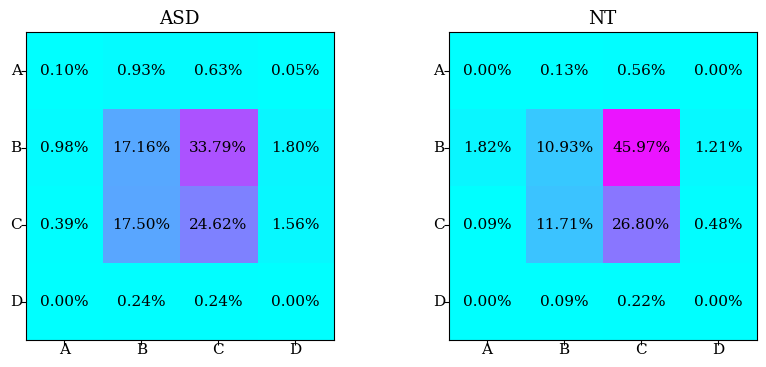

In [27]:
df_ASD = pd.DataFrame.from_dict(ASD_dict, orient='index', columns=['Percentage'])
df_NT = pd.DataFrame.from_dict(NT_dict, orient='index', columns=['Percentage'])

# Create a 4x4 grid using nested lists
grid_data1 = [[df_ASD.at[f'{region_x}{region_y}', 'Percentage'] for region_y in 'ABCD'] for region_x in 'ABCD']
grid_data2 = [[df_NT.at[f'{region_x}{region_y}', 'Percentage'] for region_y in 'ABCD'] for region_x in 'ABCD']

# Convert the grid data to numpy arrays
grid_data1 = np.array(grid_data1)
grid_data2 = np.array(grid_data2)

# Create a figure and two subplots for the heatmaps
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first heatmap
im1 = axs[0].imshow(grid_data1, cmap='cool', vmin=0, vmax=0.5)

# Add the percentage values to the heatmap
for i in range(len('ABCD')):
    for j in range(len('ABCD')):
        text = axs[0].text(j, i, f'{grid_data1[i, j]*100:.2f}%', ha='center', va='center', color='black')

axs[0].set_title('ASD')
axs[0].set_xticks(np.arange(len('ABCD')))
axs[0].set_yticks(np.arange(len('ABCD')))
axs[0].set_xticklabels('ABCD')
axs[0].set_yticklabels('ABCD')
plt.setp(axs[0].get_xticklabels(), ha="center", va="center")
plt.setp(axs[0].get_yticklabels(), ha="center", va="center")

# Plot the second heatmap
im2 = axs[1].imshow(grid_data2, cmap='cool', vmin=0, vmax=0.5)

# Add the percentage values to the heatmap
for i in range(len('ABCD')):
    for j in range(len('ABCD')):
        text = axs[1].text(j, i, f'{grid_data2[i, j]*100:.2f}%', ha='center', va='center', color='black')

axs[1].set_title('NT')
axs[1].set_xticks(np.arange(len('ABCD')))
axs[1].set_yticks(np.arange(len('ABCD')))
axs[1].set_xticklabels('ABCD')
axs[1].set_yticklabels('ABCD')
plt.setp(axs[1].get_xticklabels(), ha="center", va="center")
plt.setp(axs[1].get_yticklabels(), ha="center", va="center")

plt.show()
